# 1. Implementation

In this section, we will implement two versions of the Quicksort algorithm: a deterministic version and a randomized version. Both implementations will adhere to the core principles of Quicksort: pivot selection, partitioning, and recursive sorting of subarrays.

# 1.1 Deterministic Quicksort

The deterministic Quicksort implementation will consistently choose the last element of the subarray as its pivot.

In [23]:
import sys
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def quicksort_deterministic(arr):
    """
    Sorts an array using the deterministic Quicksort algorithm.
    The pivot is chosen as the last element of the subarray.
    """
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[-1]  # Choose the last element as the pivot
        less = []
        greater = []
        equal = []
        for x in arr:
            if x < pivot:
                less.append(x)
            elif x > pivot:
                greater.append(x)
            else:
                equal.append(x)
        return quicksort_deterministic(less) + equal + quicksort_deterministic(greater)

# Example usage:
arr = [50, 10, 8, 16, 82, 28, 61]
sorted_arr = quicksort_deterministic(arr)
print(f"Deterministic Quicksort: {sorted_arr}")

Deterministic Quicksort: [8, 10, 16, 28, 50, 61, 82]


# 1.2 Randomized Quicksort

The randomized Quicksort implementation will choose a random element from the current subarray to be the pivot. This element is then swapped with the last element to reuse the existing partitioning logic.

In [ ]:
import random

def quicksort_randomized(arr):
    """
    Sorts an array using the Randomized Quicksort algorithm.
    The pivot is chosen randomly from the subarray.
    """
    if len(arr) <= 1:
        return arr
    else:
        # Choose a random index for the pivot
        pivot_index = random.randint(0, len(arr) - 1)
        pivot = arr[pivot_index]

        less = []
        greater = []
        equal = []
        for i, x in enumerate(arr):
            # Exclude the pivot itself from partitioning initially if doing in-place
            if x < pivot:
                less.append(x)
            elif x > pivot:
                greater.append(x)
            else:
                equal.append(x)
        return quicksort_randomized(less) + equal + quicksort_randomized(greater)

# Example usage:
arr = [4, 69, 7, 1, 5, 2, 1]
sorted_arr = quicksort_randomized(arr)
print(f"Randomized Quicksort: {sorted_arr}")

Randomized Quicksort: [1, 1, 2, 4, 5, 7, 69]


# 2. Empirical Analysis
In this section, we will empirically compare the running times of the deterministic and randomized versions of Quicksort. We will test them on various input sizes and distributions to observe their practical performance and relate the results to our theoretical analysis.


 Testing quicksort_deterministic on Random Data 
  N = 100     | Avg Time: 0.000159 seconds
  N = 500     | Avg Time: 0.001119 seconds
  N = 1000    | Avg Time: 0.001911 seconds
  N = 5000    | Avg Time: 0.010338 seconds
  N = 10000   | Avg Time: 0.034605 seconds
  N = 20000   | Avg Time: 0.047977 seconds

 Testing quicksort_deterministic on Sorted Data 
  N = 100     | Avg Time: 0.000560 seconds
  N = 200     | Avg Time: 0.002565 seconds
  N = 500     | Avg Time: 0.015980 seconds
  N = 1000    | Avg Time: 0.053831 seconds
  N = 2000    | Avg Time: 0.211250 seconds
  N = 3000    | Avg Time: 0.465977 seconds

 Testing quicksort_deterministic on Reverse_Sorted Data 
  N = 100     | Avg Time: 0.000613 seconds
  N = 200     | Avg Time: 0.002586 seconds
  N = 500     | Avg Time: 0.014868 seconds
  N = 1000    | Avg Time: 0.058517 seconds
  N = 2000    | Avg Time: 0.288961 seconds
  N = 3000    | Avg Time: 0.710765 seconds

 Testing quicksort_randomized on Random Data 
  N = 100     | Avg T

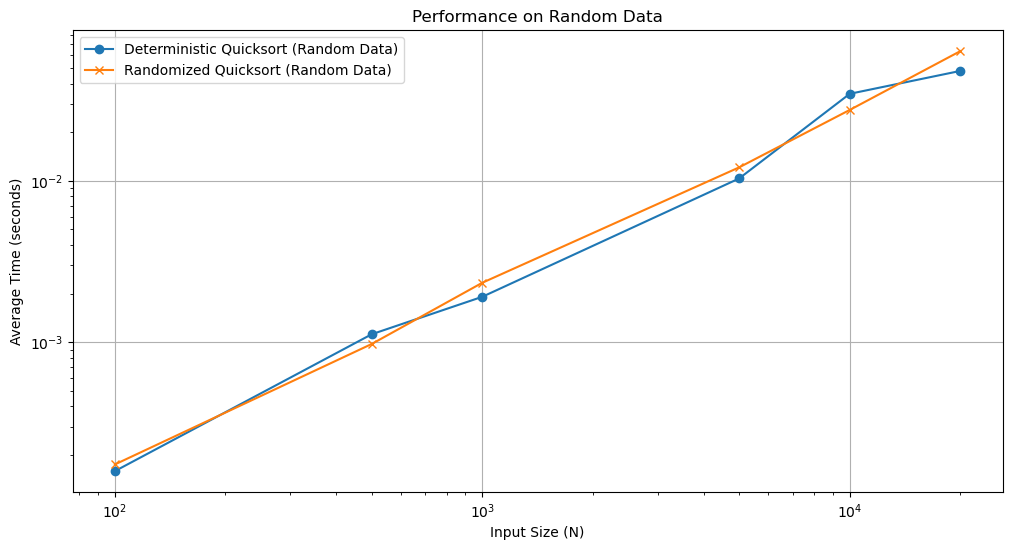

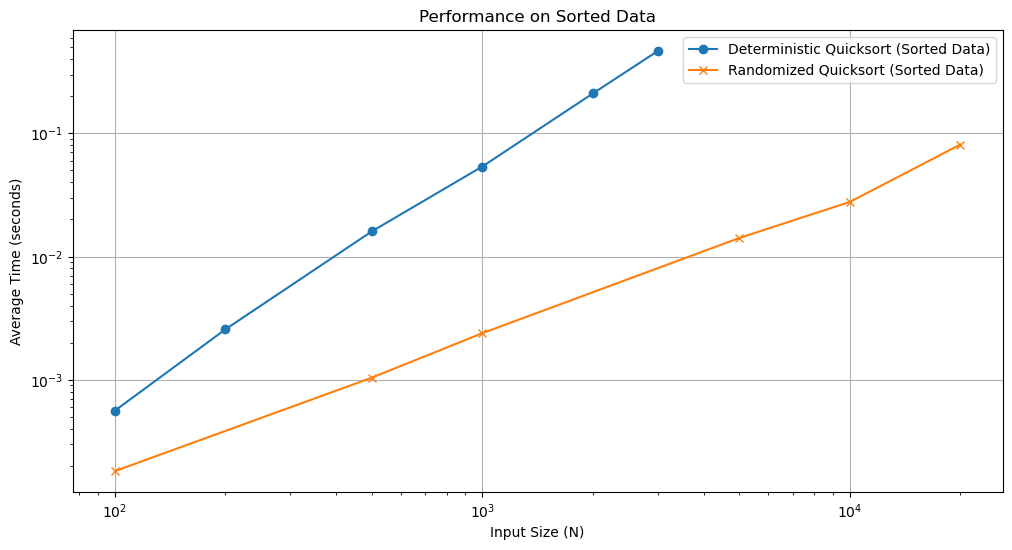

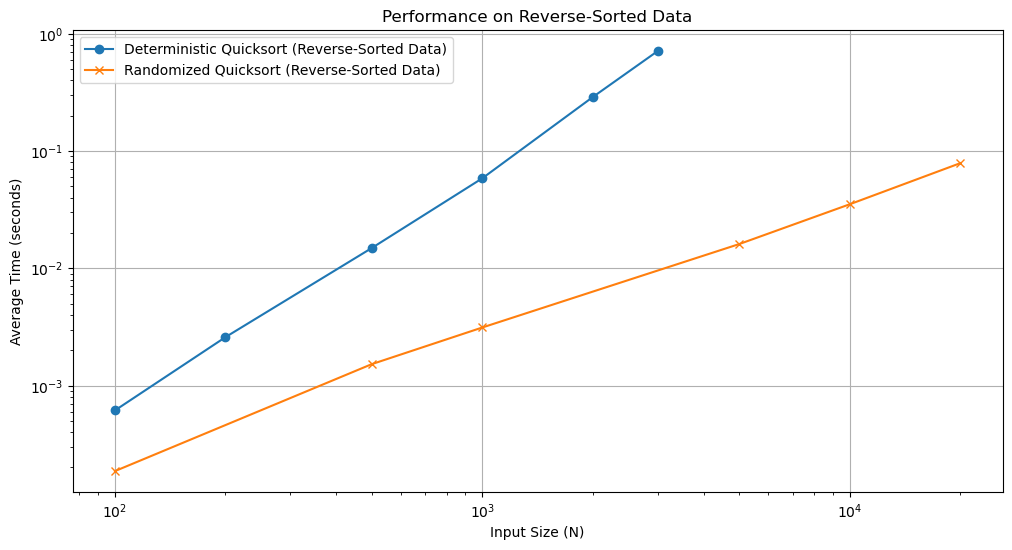


Empirical analysis complete. Check the plots for visual representation.


In [26]:
import time
import random
import matplotlib.pyplot as plt
import sys

# Set a higher recursion limit for deep recursion in worst-case Quicksort
sys.setrecursionlimit(200000) # Adjust as needed for larger N

#  Quicksort Implementations (as provided previously) 

def quicksort_deterministic(arr):
    """
    Sorts an array using the deterministic Quicksort algorithm.
    The pivot is chosen as the last element of the subarray.
    """
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[-1]  # Choose the last element as the pivot
        less = []
        greater = []
        equal = []
        for x in arr:
            if x < pivot:
                less.append(x)
            elif x > pivot:
                greater.append(x)
            else:
                equal.append(x)
        return quicksort_deterministic(less) + equal + quicksort_deterministic(greater)

def quicksort_randomized(arr):
    """
    Sorts an array using the Randomized Quicksort algorithm.
    The pivot is chosen randomly from the subarray.
    """
    if len(arr) <= 1:
        return arr
    else:
        # Choose a random index for the pivot
        pivot_index = random.randint(0, len(arr) - 1)
        pivot = arr[pivot_index]

        less = []
        greater = []
        equal = []
        for x in arr:
            if x < pivot:
                less.append(x)
            elif x > pivot:
                greater.append(x)
            else:
                equal.append(x)
        return quicksort_randomized(less) + equal + quicksort_randomized(greater)

#  Data Generation Functions 

def generate_random_array(size):
    """Generates an array of given size with random integers."""
    return [random.randint(0, size * 2) for _ in range(size)]

def generate_sorted_array(size):
    """Generates a sorted array of given size."""
    return list(range(size))

def generate_reverse_sorted_array(size):
    """Generates a reverse-sorted array of given size."""
    return list(range(size, 0, -1))

#  Empirical Analysis Function 

def run_empirical_analysis(
    sorter_func,
    input_type_generator,
    input_sizes,
    num_trials=5
):
    """
    Runs empirical tests for a given sorting function and input type generator.

    Args:
        sorter_func: The sorting function to test (e.g., quicksort_deterministic).
        input_type_generator: A function to generate the input array (e.g., generate_random_array).
        input_sizes: A list of input sizes (N) to test.
        num_trials: Number of times to run each test for averaging.

    Returns:
        A list of average times for each input size.
    """
    execution_times = []
    print(f"\n Testing {sorter_func.__name__} on {input_type_generator.__name__.replace('generate_', '').replace('_array', '').title()} Data ")
    for size in input_sizes:
        total_time = 0
        for _ in range(num_trials):
            # Create a fresh copy of the array for each trial to ensure fairness
            arr = input_type_generator(size)
            
            start_time = time.perf_counter()
            # The sorting functions return a new sorted list, so no need to copy before
            sorted_arr = sorter_func(arr)
            end_time = time.perf_counter()
            total_time += (end_time - start_time)
            
        avg_time = total_time / num_trials
        execution_times.append(avg_time)
        print(f"  N = {size:<7} | Avg Time: {avg_time:.6f} seconds")
    return execution_times

#  Main Execution Block 

if __name__ == "__main__":
    # Define the input sizes to test
    input_sizes_nlogn_range = [100, 500, 1000, 5000, 10000, 20000]
    input_sizes_n2_range = [100, 200, 500, 1000, 2000, 3000] # Smaller range for N^2 to avoid extremely long runs

    num_trials = 3 

    results = {
        'deterministic_random': [],
        'deterministic_sorted': [],
        'deterministic_reverse_sorted': [],
        'randomized_random': [],
        'randomized_sorted': [],
        'randomized_reverse_sorted': []
    }

    # Test Deterministic Quicksort
    results['deterministic_random'] = run_empirical_analysis(
        quicksort_deterministic, generate_random_array, input_sizes_nlogn_range, num_trials
    )
    results['deterministic_sorted'] = run_empirical_analysis(
        quicksort_deterministic, generate_sorted_array, input_sizes_n2_range, num_trials
    )
    results['deterministic_reverse_sorted'] = run_empirical_analysis(
        quicksort_deterministic, generate_reverse_sorted_array, input_sizes_n2_range, num_trials
    )

    # Test Randomized Quicksort
    results['randomized_random'] = run_empirical_analysis(
        quicksort_randomized, generate_random_array, input_sizes_nlogn_range, num_trials
    )
    results['randomized_sorted'] = run_empirical_analysis(
        quicksort_randomized, generate_sorted_array, input_sizes_nlogn_range, num_trials
    )
    results['randomized_reverse_sorted'] = run_empirical_analysis(
        quicksort_randomized, generate_reverse_sorted_array, input_sizes_nlogn_range, num_trials
    )

    #  Plotting Results 

    print("\n Generating Plots ")

    # Plot for Random Data
    plt.figure(figsize=(12, 6))
    plt.plot(input_sizes_nlogn_range, results['deterministic_random'], marker='o', label='Deterministic Quicksort (Random Data)')
    plt.plot(input_sizes_nlogn_range, results['randomized_random'], marker='x', label='Randomized Quicksort (Random Data)')
    plt.title('Performance on Random Data')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Average Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.xscale('log') # Use log scale for X-axis if N ranges widely
    plt.yscale('log') # Use log scale for Y-axis to better show polynomial/logarithmic growth
    plt.show()

    # Plot for Sorted Data
    plt.figure(figsize=(12, 6))
    plt.plot(input_sizes_n2_range, results['deterministic_sorted'], marker='o', label='Deterministic Quicksort (Sorted Data)')
    plt.plot(input_sizes_nlogn_range, results['randomized_sorted'], marker='x', label='Randomized Quicksort (Sorted Data)')
    plt.title('Performance on Sorted Data')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Average Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    # Plot for Reverse-Sorted Data
    plt.figure(figsize=(12, 6))
    plt.plot(input_sizes_n2_range, results['deterministic_reverse_sorted'], marker='o', label='Deterministic Quicksort (Reverse-Sorted Data)')
    plt.plot(input_sizes_nlogn_range, results['randomized_reverse_sorted'], marker='x', label='Randomized Quicksort (Reverse-Sorted Data)')
    plt.title('Performance on Reverse-Sorted Data')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Average Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    print("\nEmpirical analysis complete. Check the plots for visual representation.")